In [1]:
from diff_cap_packages import filters, stock_selection
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
%config Completer.use_jedi=False

In [2]:
start_date_backtesting = "2011-12-14"
end_date_backtesting = '2015-02-15'
step_backtesting = 10

dates = filters.prices.loc[start_date_backtesting:end_date_backtesting:step_backtesting].index.strftime("%Y-%m-%d").values
len(dates), dates

(80, array(['2011-12-14', '2011-12-29', '2012-01-13', '2012-01-30',
        '2012-02-13', '2012-02-28', '2012-03-13', '2012-03-27',
        '2012-04-11', '2012-04-25', '2012-05-09', '2012-05-23',
        '2012-06-07', '2012-06-21', '2012-07-06', '2012-07-20',
        '2012-08-03', '2012-08-17', '2012-08-31', '2012-09-17',
        '2012-10-01', '2012-10-15', '2012-10-31', '2012-11-14',
        '2012-11-29', '2012-12-13', '2012-12-28', '2013-01-14',
        '2013-01-29', '2013-02-12', '2013-02-27', '2013-03-13',
        '2013-03-27', '2013-04-11', '2013-04-25', '2013-05-09',
        '2013-05-23', '2013-06-07', '2013-06-21', '2013-07-08',
        '2013-07-22', '2013-08-05', '2013-08-19', '2013-09-03',
        '2013-09-17', '2013-10-01', '2013-10-15', '2013-10-29',
        '2013-11-12', '2013-11-26', '2013-12-11', '2013-12-26',
        '2014-01-10', '2014-01-27', '2014-02-10', '2014-02-25',
        '2014-03-11', '2014-03-25', '2014-04-08', '2014-04-23',
        '2014-05-07', '2014-05-21', 

In [ ]:
# Trains and saves models
# Creates and saves predictions
# Display the process in a somewhat nice format

num_days_back = 200
for index, end_date in enumerate(dates):
    parent_path = os.path.join('models', end_date + "-linear-" + str(num_days_back))
    
    print("--------------------")
    print("[", str(index + 1) + "/" + str(len(dates)), "]")
    print("Starting:", end_date + ".", "Using data from the previous", num_days_back, "days to train.")
    
    if not os.path.isfile(os.path.join(parent_path, 'completed.txt')):
        stock_selection.make_and_store_linear_models(end_date, num_days_back, force_overwrite=True)
    else:
        print("Model already trained and saved. Loading directly...")
    
    lrmodels = stock_selection.load_models(end_date, num_days_back)
    stock_selection.get_predictions(lrmodels, end_date, num_days_back)
    
    print("Finished.")
    print("--------------------")

In [3]:
# Gets the predictions from the saved files.

all_predictions = dict.fromkeys(dates)

num_days_back = 200
for end_date in tqdm(dates):
    all_predictions[end_date] = stock_selection.get_predictions(None, end_date, num_days_back)

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 85.68it/s]


In [4]:
all_returns = pd.DataFrame(index=dates)

for date in dates:
    predictions = all_predictions[date]
    buy_sell = stock_selection.get_buy_sell(predictions)
    all_returns.loc[date, "actual next day returns"] = stock_selection.get_actual_overall_pct_chg(buy_sell)

In [5]:
all_returns["cumulative returns"] = [((np.array(all_returns.iloc[0 : idx+1, 0]) + 1).prod() - 1) for idx in range(0, all_returns.shape[0])]
all_returns

,actual next day returns,cumulative returns
2011-12-14,-0.009550,-0.009550
2011-12-29,0.001203,-0.008359
2012-01-13,-0.001137,-0.009486
2012-01-30,0.005955,-0.003588
2012-02-13,0.004085,0.000483
2012-02-28,0.002001,0.002485
2012-03-13,-0.002616,-0.000138
2012-03-27,-0.003443,-0.003581
2012-04-11,0.002192,-0.001397
2012-04-25,0.006137,0.004731


In [ ]:
end_date = "2015-02-20"
num_days_back = 200
pred = stock_selection.get_predictions(None,end_date, num_days_back)
buy_sell = stock_selection.get_buy_sell(pred)
analysis = stock_selection.get_buy_sell_analysis(buy_sell)
# pred
analysis
# How Percent Change is Calculated
# (analysis.iloc[0:5, 1].mean() - analysis.iloc[5:10, 1].mean())/2

In [6]:
starting_amount = 100

end_amount = starting_amount
for date in dates:
    end_amount *= 1 + all_returns.loc[date, "actual next day returns"]

print("TRADING ON THE FOLLOWING DATES:\n", dates, "\n")
print("If starting with", starting_amount, "dollars,\nYou'd end up with", end_amount, "dollars")
print()
print("Overall percent change:", str(100 * (end_amount - starting_amount)/(starting_amount)) + "%")

TRADING ON THE FOLLOWING DATES:
 ['2011-12-14' '2011-12-29' '2012-01-13' '2012-01-30' '2012-02-13'
 '2012-02-28' '2012-03-13' '2012-03-27' '2012-04-11' '2012-04-25'
 '2012-05-09' '2012-05-23' '2012-06-07' '2012-06-21' '2012-07-06'
 '2012-07-20' '2012-08-03' '2012-08-17' '2012-08-31' '2012-09-17'
 '2012-10-01' '2012-10-15' '2012-10-31' '2012-11-14' '2012-11-29'
 '2012-12-13' '2012-12-28' '2013-01-14' '2013-01-29' '2013-02-12'
 '2013-02-27' '2013-03-13' '2013-03-27' '2013-04-11' '2013-04-25'
 '2013-05-09' '2013-05-23' '2013-06-07' '2013-06-21' '2013-07-08'
 '2013-07-22' '2013-08-05' '2013-08-19' '2013-09-03' '2013-09-17'
 '2013-10-01' '2013-10-15' '2013-10-29' '2013-11-12' '2013-11-26'
 '2013-12-11' '2013-12-26' '2014-01-10' '2014-01-27' '2014-02-10'
 '2014-02-25' '2014-03-11' '2014-03-25' '2014-04-08' '2014-04-23'
 '2014-05-07' '2014-05-21' '2014-06-05' '2014-06-19' '2014-07-03'
 '2014-07-18' '2014-08-01' '2014-08-15' '2014-08-29' '2014-09-15'
 '2014-09-29' '2014-10-13' '2014-10-27' '20

<IPython.core.display.Javascript object>


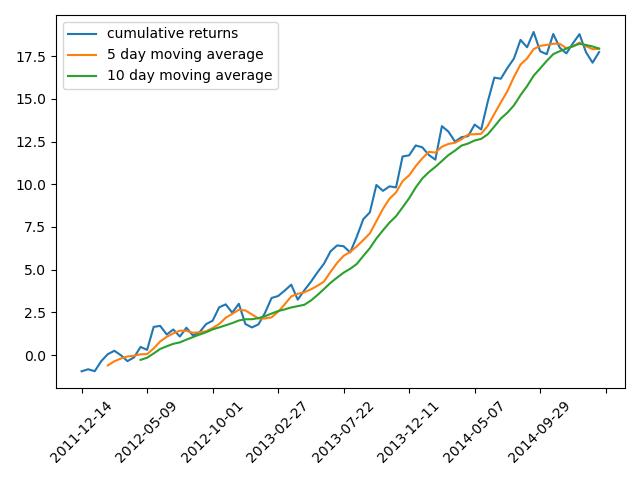

In [7]:
# Plot cumulative returns
import matplotlib.pyplot as plt
%matplotlib notebook

percent_returns = 100 * all_returns

percent_returns["cumulative returns"].plot(legend=True)

moving_average_periods = [5, 10]
for moving_average_period in moving_average_periods:
    percent_returns[str(moving_average_period) + " day moving average"] = percent_returns["cumulative returns"].rolling(window=moving_average_period).mean()
    percent_returns[str(moving_average_period) + " day moving average"].plot(legend=True)

plt.xticks(rotation=45)
plt.tight_layout()